In [1]:
uv add pandas

Note: you may need to restart the kernel to use updated packages.


Resolved 22 packages in 1ms
Audited 21 packages in 0.03ms


In [3]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.0 MB 21.2 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 22.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ------------------------- -------------- 8.1/12.7 MB 39.1 MB/s eta 0:00:01
   ---------------------------------------- 12.7/12.7 MB 36.7 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [nump

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pandas as pd

In [12]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.1 MB 41.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 33.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 38.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 39.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
df=pd.read_pickle('processed_conversations2.pkl')

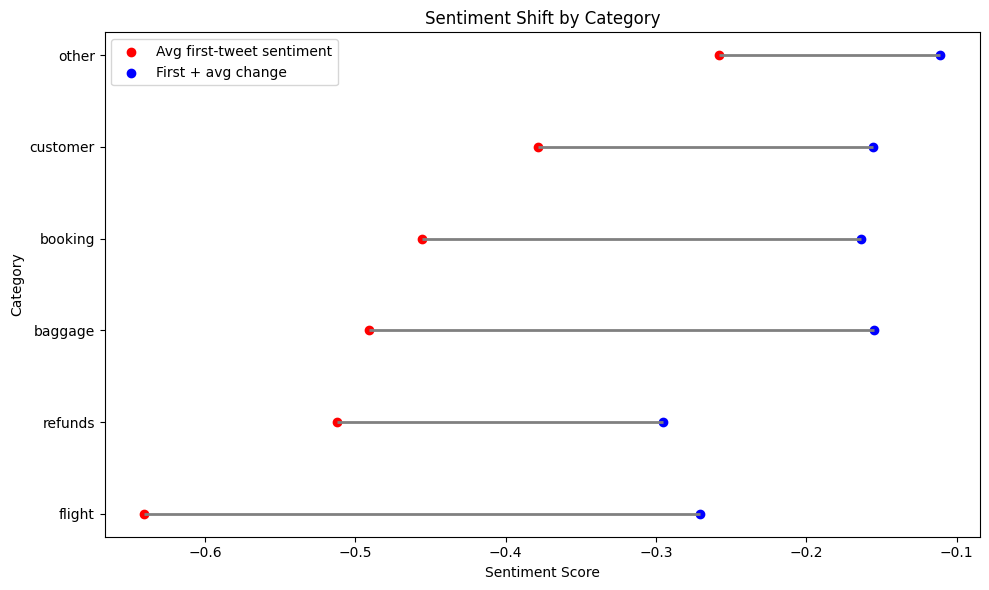

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (update the path as needed)
# If your CSV was read with a MultiIndex, we'll reset it to access 'tweet' as a column:

df = df.reset_index()


# Now identify first tweet of each conversation
first_tweets = df[df['tweet'] == 0].copy()

# Compute average sentiment score per category for first tweets (red)
base_sentiment = first_tweets.groupby('category')['sentiment_score'].mean().rename('base')

# Compute average sentiment_change per conversation, then adjusted score per conversation
delta = df.groupby(['category', 'conversation'])['sentiment_change'].mean().reset_index()
delta = delta.merge(
    first_tweets[['category', 'conversation', 'sentiment_score']],
    on=['category', 'conversation']
)
delta['adjusted'] = delta['sentiment_score'] + delta['sentiment_change']

# Compute average adjusted score per category (blue)
adjusted_sentiment = delta.groupby('category')['adjusted'].mean().rename('adjusted')

# Combine into plotting DataFrame
plot_df = pd.concat([base_sentiment, adjusted_sentiment], axis=1).reset_index()
plot_df = plot_df.sort_values('base')

# Create dumbbell plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines(plot_df['category'], plot_df['base'], plot_df['adjusted'], color='gray', linewidth=2)
ax.scatter(plot_df['base'], plot_df['category'], color='red', label='Avg first-tweet sentiment')
ax.scatter(plot_df['adjusted'], plot_df['category'], color='blue', label='First + avg change')

ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Category')
ax.set_title('Sentiment Shift by Category')
ax.legend()
plt.tight_layout()
plt.show()
